<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity/blob/main/notebooks/al_dfs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Depth First Search (DFS)

In [1]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git 2>/dev/null

In [2]:
from algorithmic_complexity.aclib import graphstuff as gs
import numpy as np
import networkx as nx

In [3]:
%%file 1.adjlist
0 3 4
1 3 5 6
2 4 5 6
3 0 1 7
4 0 2 6
5 1 2 6 7
6 1 2 4 5
7 3 5

Writing 1.adjlist


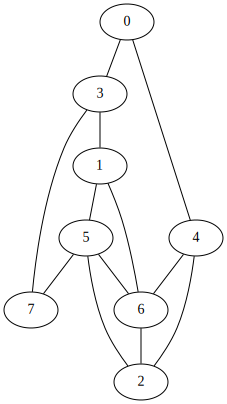

In [4]:
G = nx.read_adjlist('1.adjlist')
gs.as_gv(G)

## Recursive implementation with networkx graph

In [5]:
def _dfs(G, u):
  if not G.nodes[u]['visited']:
    G.nodes[u]['visited'] = True
    for v in G.neighbors(u):
      if not G.nodes[v]['visited']:
        G.nodes[v]['π'] = u
        _dfs(G, v)


def dfs(G, s):
  for u in G.nodes:
    G.nodes[u]['visited'] = False
    G.nodes[u]['π'] = -1
  _dfs(G, s)

[3, 5, 4, 1, 0, -1, 2, 3]


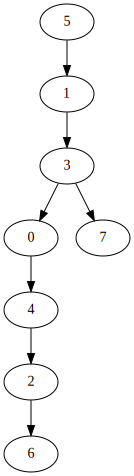

In [6]:
dfs(G, '5')
path = [0]*G.number_of_nodes()
for v, info in G.nodes.data():
  path[int(v)] = int(info['π'])

print(path)
gs.path2gv(path)

## Non recursive implementation with networkx graph

In [7]:
def dfsWithStack(G, s):
  for u in G.nodes:
    G.nodes[u]['visited'] = False
    G.nodes[u]['π'] = -1

  stack = [s]
  while stack:
    u = stack.pop()
    if not G.nodes[u]['visited']:
      G.nodes[u]['visited'] = True
      for v in reversed(list(G.neighbors(u))):
        if not G.nodes[v]['visited']:
          G.nodes[v]['π'] = u
          stack.append(v)

  path = [0]*G.number_of_nodes()
  for v, info in G.nodes.data():
    path[int(v)] = int(info['π'])

  return path

[3, 5, 4, 1, 0, -1, 2, 3]


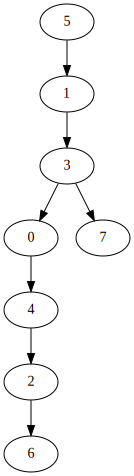

In [8]:
path = dfsWithStack(G, '5')
print(path)
gs.path2gv(path)